In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))
import functions_ml as fml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import hamming_loss, f1_score, jaccard_score, accuracy_score, multilabel_confusion_matrix
from scipy.cluster.hierarchy import linkage, dendrogram
# Set font properties globally (Times New Roman and font size 14)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

In [2]:
# PARAMETERS
BINARY_CLASSIFICATON = False
TOLERANCE_LIMIT = 0.01 / 100

# 1. Get dataset
results = pd.read_csv('../datasets/instances_results.csv')
features = pd.read_csv('../datasets/multi_plant_instance_features.csv')
dataset = fml.create_dataset(features, results)

# 2. Create target columns for multi label classification
dataset = fml.create_multi_label_columns(dataset, TOLERANCE_LIMIT)

In [3]:
methods_df = dataset[['instance'] + [col for col in dataset if 'RF' in col]].rename(columns={'RF_T_0': 'Gurobi'})

In [4]:
methods_df.loc[(methods_df['RF_1_0'] == 1)]

,instance,RF_1_0,RF_2_0,RF_2_1,RF_3_0,RF_3_1,RF_3_2,RF_4_0,RF_4_1,RF_4_2,RF_4_3,RF_6_0,RF_6_1,RF_6_2,RF_6_3,RF_6_4,RF_6_5,Gurobi
478,AAA00_12_6_120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55,NAA04_12_20_60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
460,NAB01_12_15_120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
446,AAA01_12_20_60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
258,AAA01_12_6_120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68,NAB04_12_6_120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
132,AAA04_12_20_10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
528,NAB01_12_6_120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
255,AAA03_12_20_60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
284,NAA01_12_20_10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# methods_df.loc[(methods_df['RF_3_0'] == 1) & (methods_df['RF_T_0'] == 1)].head(1).T.to_csv('x.csv', index=True)

In [6]:
df = methods_df.drop(columns='instance')

# Correlação

In [7]:
correlation_matrix = df.corr()

In [8]:
correlation_matrix

,RF_1_0,RF_2_0,RF_2_1,RF_3_0,RF_3_1,RF_3_2,RF_4_0,RF_4_1,RF_4_2,RF_4_3,RF_6_0,RF_6_1,RF_6_2,RF_6_3,RF_6_4,RF_6_5,Gurobi
RF_1_0,1.000000,-0.119898,-0.114514,-0.110013,-0.142245,-0.137198,-0.110944,-0.159182,-0.190859,-0.189280,-0.188955,-0.187321,-0.207255,-0.245681,-0.245681,-0.228776,-0.274241
RF_2_0,-0.119898,1.000000,0.230964,0.221092,0.147230,0.093527,0.229712,0.143558,0.021895,-0.034980,0.106283,0.051012,-0.011728,-0.017546,-0.082028,-0.146205,-0.146636
RF_2_1,-0.114514,0.230964,1.000000,0.389629,0.437590,0.410222,0.341011,0.340617,0.275892,0.218286,0.237629,0.211323,0.190998,0.136549,0.117654,0.063115,0.078680
RF_3_0,-0.110013,0.221092,0.389629,1.000000,0.474536,0.340112,0.532892,0.457055,0.246751,0.158772,0.404657,0.292008,0.252555,0.178906,0.085446,-0.007462,-0.003936
RF_3_1,-0.142245,0.147230,0.437590,0.474536,1.000000,0.464832,0.440450,0.463953,0.374084,0.305828,0.303498,0.290265,0.292136,0.226321,0.175799,0.137627,0.117381
RF_3_2,-0.137198,0.093527,0.410222,0.340112,0.464832,1.000000,0.399195,0.506686,0.601717,0.570237,0.525987,0.522137,0.542675,0.482265,0.456537,0.420853,0.428582
RF_4_0,-0.110944,0.229712,0.341011,0.532892,0.440450,0.399195,1.000000,0.564858,0.409104,0.285068,0.526574,0.405662,0.394631,0.319036,0.217389,0.118784,0.125513
RF_4_1,-0.159182,0.143558,0.340617,0.457055,0.463953,0.506686,0.564858,1.000000,0.573361,0.437179,0.561755,0.477726,0.520719,0.487951,0.364688,0.303892,0.277542
RF_4_2,-0.190859,0.021895,0.275892,0.246751,0.374084,0.601717,0.409104,0.573361,1.000000,0.692624,0.548789,0.579398,0.644654,0.601647,0.548323,0.531875,0.478911
RF_4_3,-0.189280,-0.034980,0.218286,0.158772,0.305828,0.570237,0.285068,0.437179,0.692624,1.000000,0.490820,0.594570,0.660451,0.671033,0.678679,0.679499,0.615076


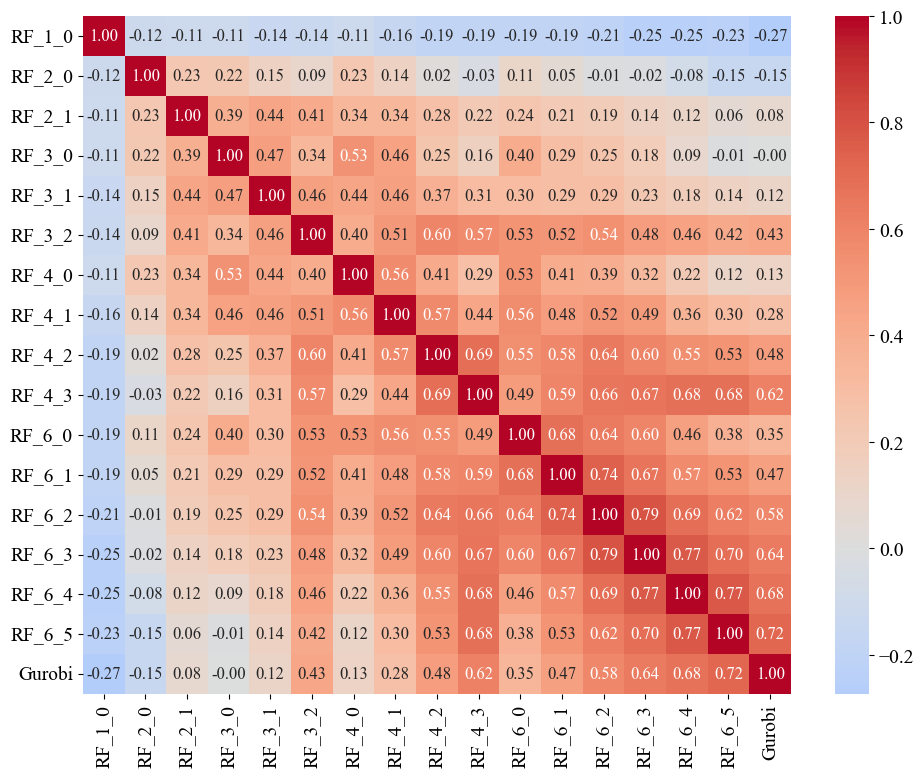

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", annot_kws={"size": 12})  # Adjust annotation font size
# plt.title("Correlation Heatmap")
plt.tight_layout()
if TOLERANCE_LIMIT == 0.01 / 100:
    plt.savefig('fig_heatmap_correlacao_0.01.png', dpi=300, bbox_inches='tight')
plt.show()

# Co-ocorrência

In [10]:
# Calculate the co-occurrence matrix
co_occurrence_matrix = np.dot(df.T, df)

# Convert to DataFrame for readability
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=df.columns, columns=df.columns)
print("Co-Occurrence Matrix:")
co_occurrence_df

Co-Occurrence Matrix:


,RF_1_0,RF_2_0,RF_2_1,RF_3_0,RF_3_1,RF_3_2,RF_4_0,RF_4_1,RF_4_2,RF_4_3,RF_6_0,RF_6_1,RF_6_2,RF_6_3,RF_6_4,RF_6_5,Gurobi
RF_1_0,51,1,1,3,1,1,3,2,0,0,1,1,2,0,0,0,0
RF_2_0,1,99,34,40,34,28,41,41,30,24,41,35,35,37,30,20,28
RF_2_1,1,34,93,53,58,54,49,58,53,47,52,49,54,51,49,40,50
RF_3_0,3,40,53,122,72,57,77,82,61,51,82,69,74,69,58,43,54
RF_3_1,1,34,58,72,125,70,69,84,76,68,72,70,80,76,70,61,70
RF_3_2,1,28,54,57,70,119,63,86,98,94,94,93,106,103,100,91,104
RF_4_0,3,41,49,77,69,63,123,94,79,65,96,82,91,86,74,58,70
RF_4_1,2,41,58,82,84,86,94,162,114,97,118,107,126,127,111,97,109
RF_4_2,0,30,53,61,76,98,79,114,168,130,119,122,145,145,138,129,139
RF_4_3,0,24,47,51,68,94,65,97,130,166,111,123,146,153,154,147,156


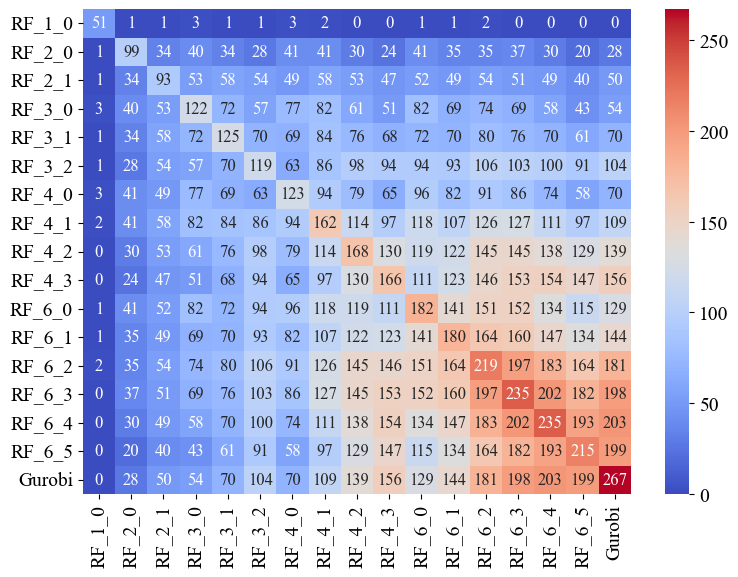

In [11]:

# Co-occurrence heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence_df, annot=True, cmap='coolwarm', fmt='d', annot_kws={"size": 12})
# plt.title("Co-Occurrence Heatmap")
plt.tight_layout()
if TOLERANCE_LIMIT == 0.01 / 100:
    plt.savefig('fig_heatmap_coocorrencia_0.01.png', dpi=300, bbox_inches='tight')
elif TOLERANCE_LIMIT == 0:
    plt.savefig('fig_heatmap_coocorrencia_0.png', dpi=300, bbox_inches='tight')
plt.show()

# Clusterização

## Coocorrência

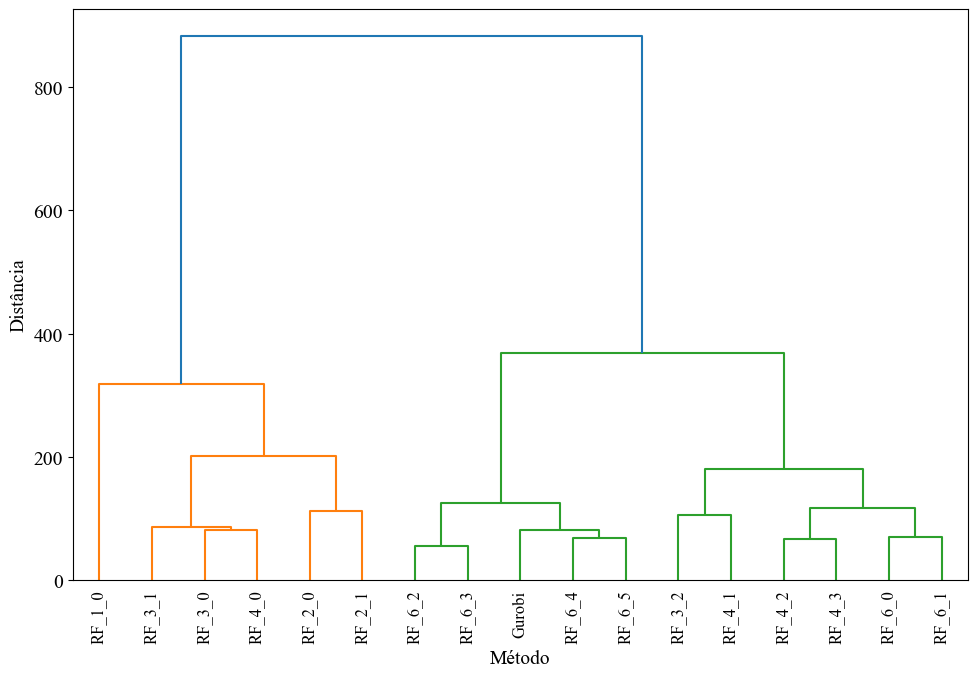

In [ ]:
# Perform hierarchical clustering on co-occurrence matrix
linkage_matrix = linkage(co_occurrence_df, method='ward')  # Ward's method for clustering

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=co_occurrence_df.columns, leaf_rotation=90)
# plt.title("Hierarchical Clustering of Methods (Co-Occurrence)")
plt.xlabel("Método")
plt.ylabel("Distância")
plt.tight_layout()
if TOLERANCE_LIMIT == 0.01 / 100:
    plt.savefig('fig_cluster_coocorrencia_0.01.png', dpi=300, bbox_inches='tight')
plt.show()

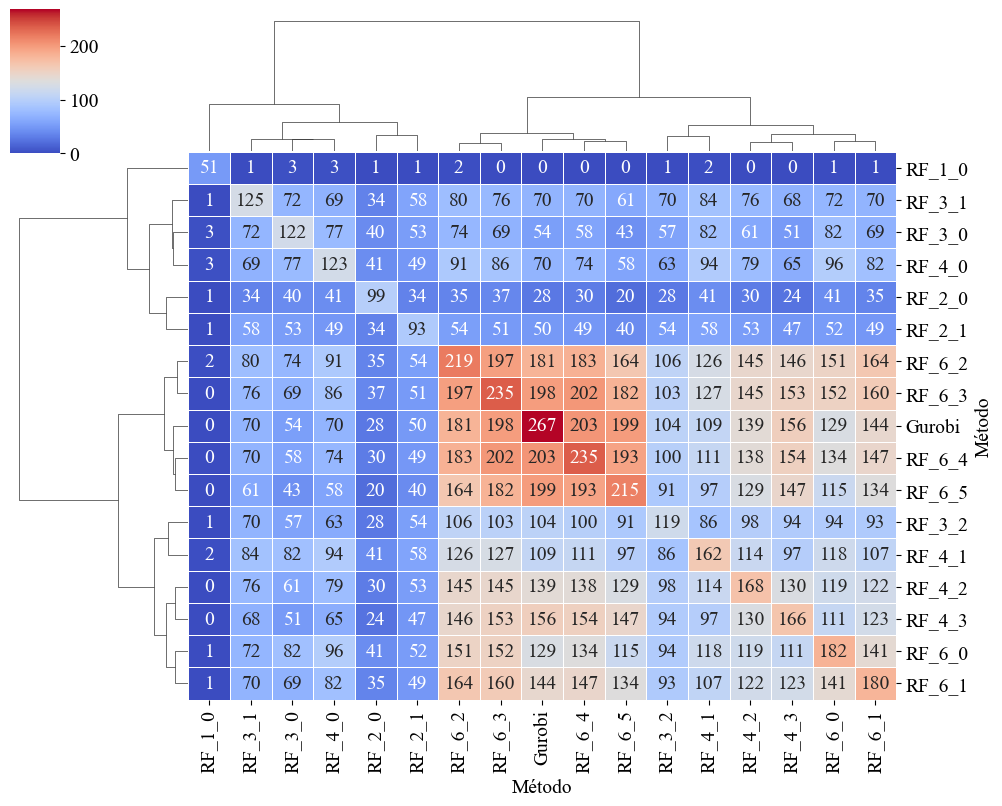

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# Assuming co_occurrence_df is your co-occurrence matrix (DataFrame)

# Compute linkage for clustering rows and columns
linkage_rows = linkage(co_occurrence_df, method='ward')  # Clustering for rows
linkage_cols = linkage(co_occurrence_df.T, method='ward')  # Clustering for columns

# Create the clustermap
clustermap = sns.clustermap(
    co_occurrence_df,  # Input co-occurrence matrix
    row_linkage=linkage_rows,  # Use computed linkage for rows
    col_linkage=linkage_cols,  # Use computed linkage for columns
    method="ward",  # Clustering method
    cmap="coolwarm",  # Color map
    linewidths=0.5,  # Add gridlines for better visualization
    figsize=(10, 8),  # Adjust figure size
    annot=True,  # Add numbers (optional, for small matrices)
    fmt="d"  # Format of annotations (integer for co-occurrence counts)
)

# Customize plot aesthetics
# clustermap.ax_heatmap.set_xlabel("Método")  # Set x-axis label
# clustermap.ax_heatmap.set_ylabel("Método")  # Set y-axis label

# Save the plot if TOLERANCE_LIMIT matches
if TOLERANCE_LIMIT == 0.01 / 100:
    clustermap.savefig('fig_clustermap_coocorrencia_0.01.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## Instâncias

In [20]:
df

,RF_1_0,RF_2_0,RF_2_1,RF_3_0,RF_3_1,RF_3_2,RF_4_0,RF_4_1,RF_4_2,RF_4_3,RF_6_0,RF_6_1,RF_6_2,RF_6_3,RF_6_4,RF_6_5,Gurobi
136,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
459,0,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0
271,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
425,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
389,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,1,1
385,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


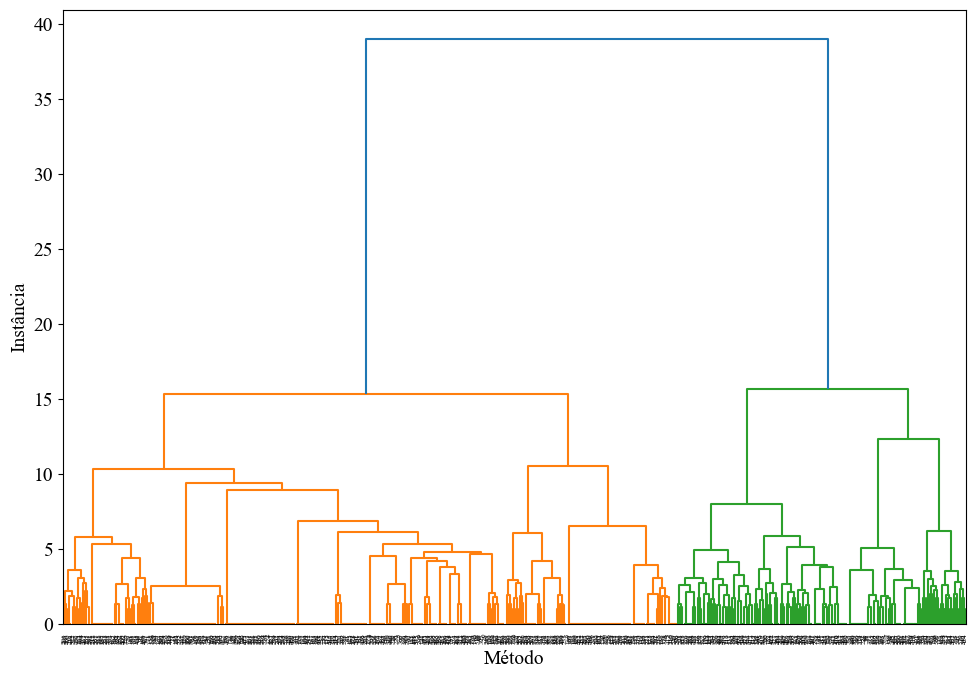

In [ ]:
# Perform hierarchical clustering on instance-method matrix
linkage_matrix = linkage(df, method='ward')  # Ward's method for clustering

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90)
# plt.title("Hierarchical Clustering of Methods (Co-Occurrence)")
plt.xlabel("Método")
plt.ylabel("Instância")
plt.tight_layout()
if TOLERANCE_LIMIT == 0.01 / 100:
    plt.savefig('fig_cluster_coocorrencia_0.01.png', dpi=300, bbox_inches='tight')
plt.show()